# Data Cleaning & Exploratory Data Analysis

   Importing Python libraries

In [204]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

#         

# Loading dataset:

In [205]:
data = pd.read_csv('cars.csv') 

In [206]:
data

,car_name,year,mileage,fuel_type,seller_type,transmission_type,previous_owners,selling_price
0,ritz,2014.0,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013.0,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017.0,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011.0,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014.0,42450,Diesel,Dealer,Manual,0,4.60
...,...,...,...,...,...,...,...,...
296,city,2016.0,33988,Diesel,Dealer,Manual,0,9.50
297,brio,2015.0,60000,Petrol,Dealer,Manual,0,4.00
298,city,2009.0,87934,Petrol,Dealer,Manual,0,3.35
299,city,2017.0,9000,Diesel,Dealer,Manual,0,11.50


#      

#      

# Data Cleaning:

In [207]:
data.dtypes

car_name              object
year                 float64
mileage                int64
fuel_type             object
seller_type           object
transmission_type     object
previous_owners        int64
selling_price        float64
dtype: object

# Checking missing Values

 Is there any missing values?

In [208]:
data.isnull().values.any()

True

# Count of missing values

In [209]:
np.sum(data.isnull().any(axis=1))

4

In [210]:
data[data.isnull().any(axis=1)].head(10)

,car_name,year,mileage,fuel_type,seller_type,transmission_type,previous_owners,selling_price
52,innova,NaN,15000,Diesel,Dealer,Automatic,0,18.00
110,KTM RC200,NaN,6000,Petrol,Individual,Manual,0,1.20
201,NaN,2010.0,58000,Diesel,Dealer,Manual,1,3.25
256,city,2016.0,49562,Petrol,Dealer,Manual,0,NaN


# Counts of missing values in each column

In [211]:
data.isnull().sum()

car_name             1
year                 2
mileage              0
fuel_type            0
seller_type          0
transmission_type    0
previous_owners      0
selling_price        1
dtype: int64

# Here I want to treat those detected missing values:

In [212]:
year_missings = pd.isnull(data["year"])  
data[year_missings]  

,car_name,year,mileage,fuel_type,seller_type,transmission_type,previous_owners,selling_price
52,innova,NaN,15000,Diesel,Dealer,Automatic,0,18.0
110,KTM RC200,NaN,6000,Petrol,Individual,Manual,0,1.2


    As shown above, there are 2 missing values in "year". Here I filld these missing values with the mean:

In [213]:
data['year'] = data['year'].fillna(data['year'].mean() )

# checking again Counts of missing values in each column

In [214]:
data.isnull().sum()

car_name             1
year                 0
mileage              0
fuel_type            0
seller_type          0
transmission_type    0
previous_owners      0
selling_price        1
dtype: int64

# Also, the "car_name" has 1 missing value. Since this is a categorical variable and it's only one,  I will drop the mssing value below:

In [215]:
data[data.car_name.isnull()]

,car_name,year,mileage,fuel_type,seller_type,transmission_type,previous_owners,selling_price
201,NaN,2010.0,58000,Diesel,Dealer,Manual,1,3.25


In [216]:
data= data.drop(data.index[201])

# checking again Counts of missing values in each column

In [217]:
data.isnull().sum()

car_name             0
year                 0
mileage              0
fuel_type            0
seller_type          0
transmission_type    0
previous_owners      0
selling_price        1
dtype: int64

# Treating the missing value in "selling_price": Since the "selling_price" is numircal value, I will replace the missing value with the mean of selling price:

     This will not effect the prediction later, since it is only one missing value:

In [218]:
data['selling_price'] = data['selling_price'].fillna(data['selling_price'].mean() )

# checking again Counts of missing values in each column

In [219]:
data.isnull().sum()

car_name             0
year                 0
mileage              0
fuel_type            0
seller_type          0
transmission_type    0
previous_owners      0
selling_price        0
dtype: int64

     As it shown above, there is no any missing value left.

#                                 

#                              

# Exploratory Data Analysis EDA:

In [220]:
data.describe()

,year,mileage,previous_owners,selling_price
count,300.000000,300.000000,300.000000,300.000000
mean,2013.620725,36877.030000,0.040000,4.647324
std,2.878912,38932.761861,0.242065,5.080360
min,2003.000000,500.000000,0.000000,0.100000
25%,2012.000000,15000.000000,0.000000,0.875000
50%,2014.000000,32000.000000,0.000000,3.625000
75%,2016.000000,48191.750000,0.000000,6.000000
max,2018.000000,500000.000000,3.000000,35.000000


# Counts Distribution of top 10 milage

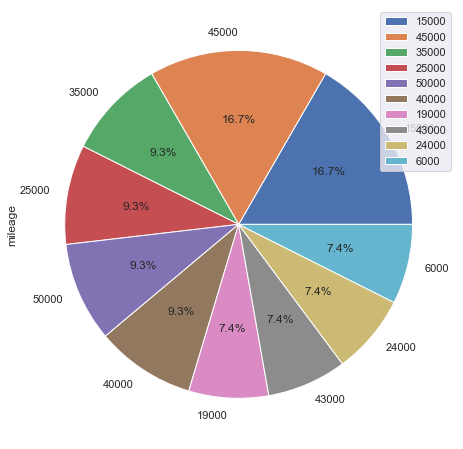

In [221]:
data["mileage"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Counts Distribution of top 10 year

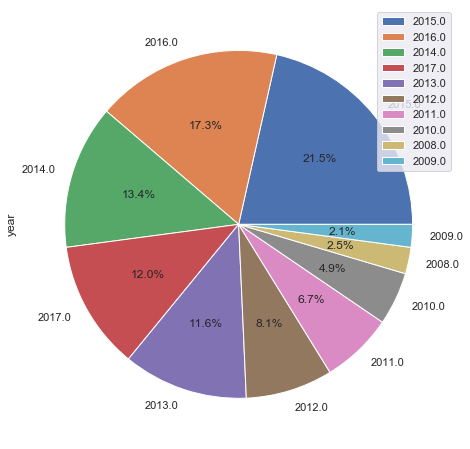

In [222]:
data["year"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Counts Distribution of top 10 car name

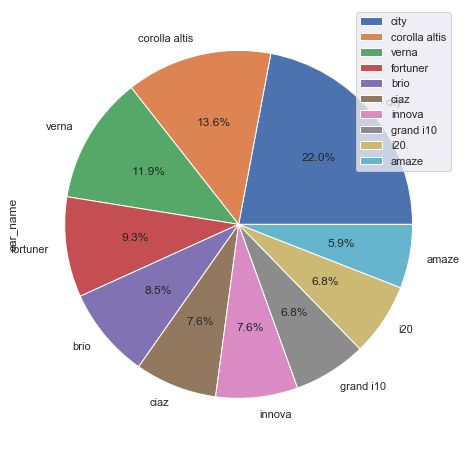

In [223]:
data["car_name"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Counts Distribution of top 10 selling_price

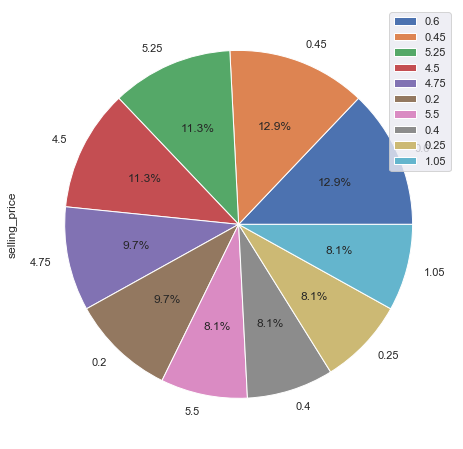

In [224]:
data["selling_price"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Counts Distribution of previous_owners

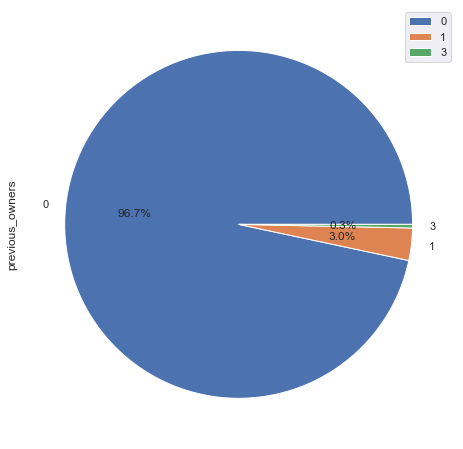

In [225]:
data["previous_owners"].value_counts().head(3).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Counts Distribution of seller_type

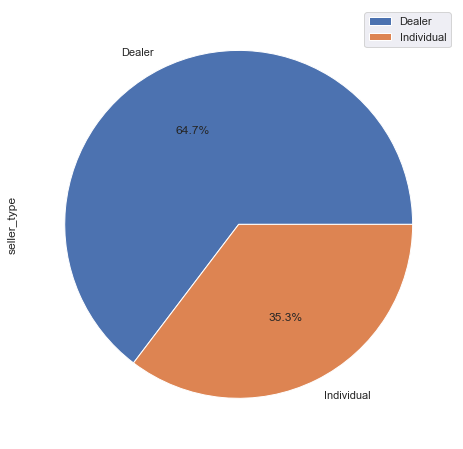

In [226]:
data["seller_type"].value_counts().head(3).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Counts Distribution of transmission_type

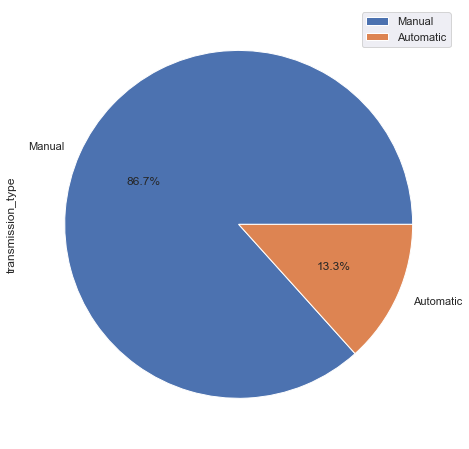

In [227]:
data["transmission_type"].value_counts().head(3).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Counts Distribution of fuel_type

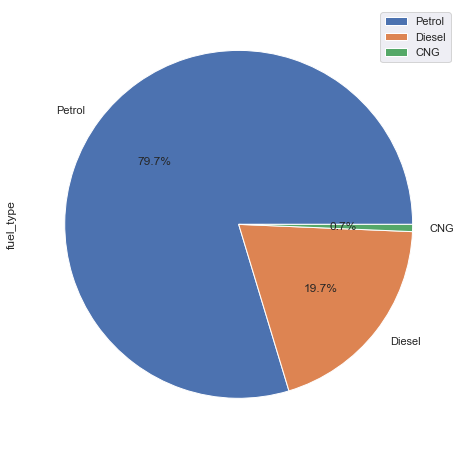

In [228]:
data["fuel_type"].value_counts().head(3).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

   # Detecting outliers in the data for each feature:
   First, lets start with selling_price column and see its statstical descripation to assess whether it has abnormality distrbuation:

In [229]:
data['selling_price'].describe()

count    300.000000
mean       4.647324
std        5.080360
min        0.100000
25%        0.875000
50%        3.625000
75%        6.000000
max       35.000000
Name: selling_price, dtype: float64

##### If we notce the above values, the difference between the 75% percentile and the Max value is really wide. Thus, it is an outlier issue.  Whereas, the difference between the Min and the 25% percentile is acceptable

#### The blow boxplot visualize these outliers clearly:

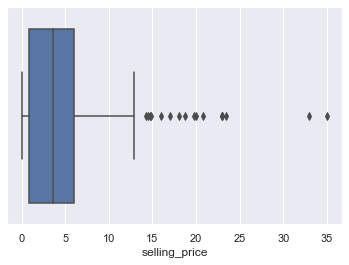

In [230]:
sns.boxplot(x=data['selling_price'])

#### Now I want to find the value for the 90% percentile number to use as reference to remove all value that is above it:

The logic behind removing or dropping the outliers in the "selling_price" column is because this is the label that I will use to make the predication. I want to make this column as clean and precise as possible. Thus, I will not replace the outliers with mean or mode or any other method. Also, since the number or outliers is ont big to effect the prediction hugaly when deleted. 

In [231]:
print(data['selling_price'].quantile(0.90))

9.275000000000006


In [232]:
max_theshold= data['selling_price'].quantile(0.90)
data[data['selling_price']> max_theshold]

,car_name,year,mileage,fuel_type,seller_type,transmission_type,previous_owners,selling_price
50,fortuner,2012.000000,104707,Diesel,Dealer,Automatic,0,14.90
51,fortuner,2015.000000,40000,Diesel,Dealer,Automatic,0,23.00
52,innova,2013.608696,15000,Diesel,Dealer,Automatic,0,18.00
53,fortuner,2013.000000,135000,Diesel,Individual,Automatic,0,16.00
59,fortuner,2014.000000,41000,Diesel,Dealer,Automatic,0,19.99
62,fortuner,2014.000000,78000,Diesel,Dealer,Automatic,0,18.75
63,fortuner,2015.000000,47000,Diesel,Dealer,Automatic,0,23.50
64,fortuner,2017.000000,6000,Diesel,Dealer,Automatic,0,33.00
66,innova,2017.000000,11000,Petrol,Dealer,Automatic,0,19.75
69,corolla altis,2016.000000,12000,Petrol,Dealer,Manual,0,14.25


In [233]:
data = data[data['selling_price']< max_theshold]
data.shape

(270, 8)

# Now after I cleaned the selling_price data from the outliers, lets take a look and visualize the data distribution:

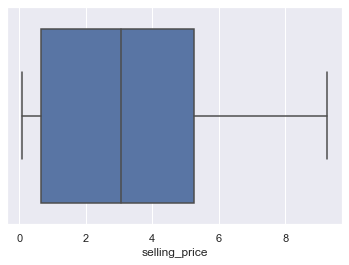

In [234]:
sns.boxplot(x=data['selling_price'])

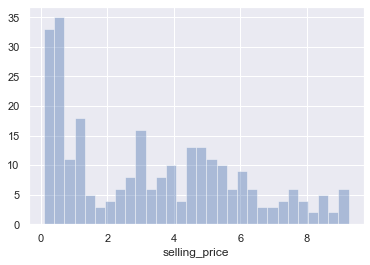

In [235]:
sns.distplot(data['selling_price'],kde=False,bins=30)

# Now, I will do the same above steps to treat the "mileage" column:


In [236]:
data['mileage'].describe()

count       270.000000
mean      36499.611111
std       39716.299762
min         500.000000
25%       15000.250000
50%       31802.000000
75%       47750.000000
max      500000.000000
Name: mileage, dtype: float64

#### In the above info, notce the difference between the 75% percentile and the max value. The difference is 440K, whereas, the difference between the min and 25% percentile is approx 14K.

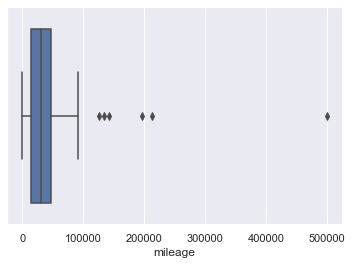

In [237]:
sns.boxplot(x=data['mileage'])

In [238]:
print(data['mileage'].quantile(0.95))

77539.75


In [239]:
max_mileage_theshold= data['mileage'].quantile(0.95)
data[data['mileage']> max_mileage_theshold]

,car_name,year,mileage,fuel_type,seller_type,transmission_type,previous_owners,selling_price
37,800,2003.0,127000,Petrol,Individual,Manual,0,0.35
54,innova,2005.0,90000,Petrol,Individual,Manual,0,2.75
68,corolla altis,2011.0,88000,Petrol,Dealer,Manual,0,4.35
74,etios cross,2014.0,83000,Diesel,Dealer,Manual,0,4.90
77,corolla,2004.0,135154,Petrol,Dealer,Automatic,0,1.50
78,corolla altis,2010.0,80000,Petrol,Dealer,Automatic,0,5.25
84,innova,2005.0,197176,Diesel,Dealer,Manual,0,3.49
85,camry,2006.0,142000,Petrol,Individual,Automatic,3,2.50
94,corolla altis,2008.0,89000,Petrol,Dealer,Automatic,0,4.00
179,Honda Karizma,2010.0,213000,Petrol,Individual,Manual,0,0.31


In [240]:
data = data[data['mileage']< max_mileage_theshold]
data.shape

(256, 8)

# Now after I cleaned the mileage data from the outliers, lets take a look visualize the ditrubation of the data:

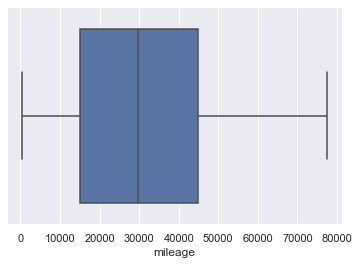

In [241]:
sns.boxplot(x=data['mileage'])

# Pair plot which is showing the the combination of each two columns 

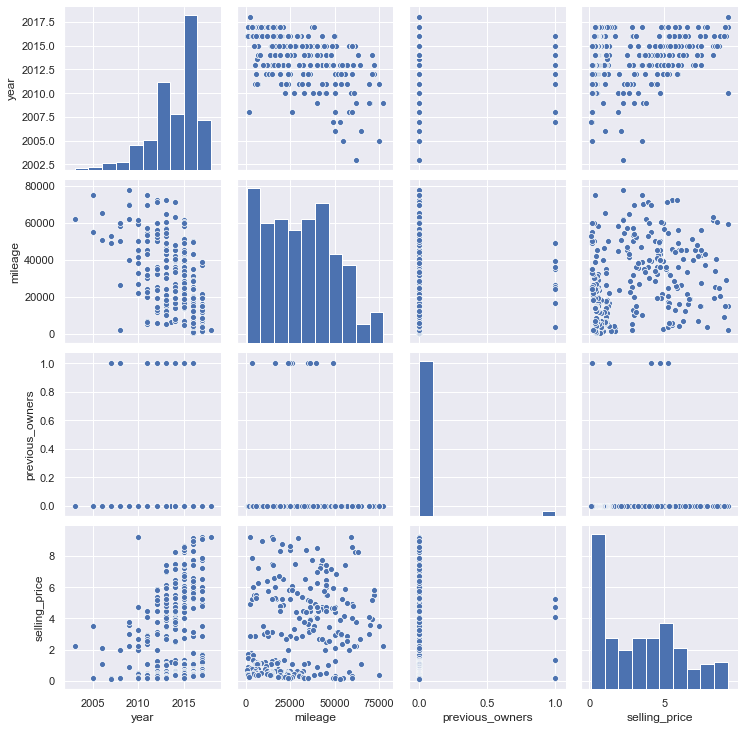

In [242]:
sns.pairplot(data)

# We have object data types as well. Object data types cannnot feed to the machine learning models so we need to convert them into unique numbers of each column 

In [243]:
data.dtypes

car_name              object
year                 float64
mileage                int64
fuel_type             object
seller_type           object
transmission_type     object
previous_owners        int64
selling_price        float64
dtype: object

# Car names before encoding 

In [244]:
data['car_name']

0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
293       city
294      amaze
295       city
297       brio
300       brio
Name: car_name, Length: 256, dtype: object

# Car names after encoding 

In [245]:
pro= preprocessing.LabelEncoder()

encpro=pro.fit_transform(data['car_name'])
data['car_name'] = encpro
data['car_name']

0      84
1      87
2      66
3      90
4      86
       ..
293    67
294    63
295    67
297    65
300    65
Name: car_name, Length: 256, dtype: int32

# fuel_type before encoding 

In [246]:
data['fuel_type']

0      Petrol
1      Diesel
2      Petrol
3      Petrol
4      Diesel
        ...  
293    Petrol
294    Petrol
295    Diesel
297    Petrol
300    Petrol
Name: fuel_type, Length: 256, dtype: object

# fuel_type after encoding 

In [247]:
encpro=pro.fit_transform(data['fuel_type'])
data['fuel_type'] = encpro
data['fuel_type']

0      2
1      1
2      2
3      2
4      1
      ..
293    2
294    2
295    1
297    2
300    2
Name: fuel_type, Length: 256, dtype: int32

# seller_type before encoding 

In [248]:
data['seller_type']

0      Dealer
1      Dealer
2      Dealer
3      Dealer
4      Dealer
        ...  
293    Dealer
294    Dealer
295    Dealer
297    Dealer
300    Dealer
Name: seller_type, Length: 256, dtype: object

# seller_type after encoding 

In [249]:
encpro=pro.fit_transform(data['seller_type'])
data['seller_type'] = encpro
data['seller_type']

0      0
1      0
2      0
3      0
4      0
      ..
293    0
294    0
295    0
297    0
300    0
Name: seller_type, Length: 256, dtype: int32

# transmission_type before encoding 

In [250]:
data['transmission_type']

0      Manual
1      Manual
2      Manual
3      Manual
4      Manual
        ...  
293    Manual
294    Manual
295    Manual
297    Manual
300    Manual
Name: transmission_type, Length: 256, dtype: object

# transmission_type after encoding 

In [251]:
encpro=pro.fit_transform(data['transmission_type'])
data['transmission_type'] = encpro
data['transmission_type']

0      1
1      1
2      1
3      1
4      1
      ..
293    1
294    1
295    1
297    1
300    1
Name: transmission_type, Length: 256, dtype: int32

# A heat map for graphical representation of data where the pairs of the coulmns contained in a matrix are represented as colors to show the correlation of varibles:

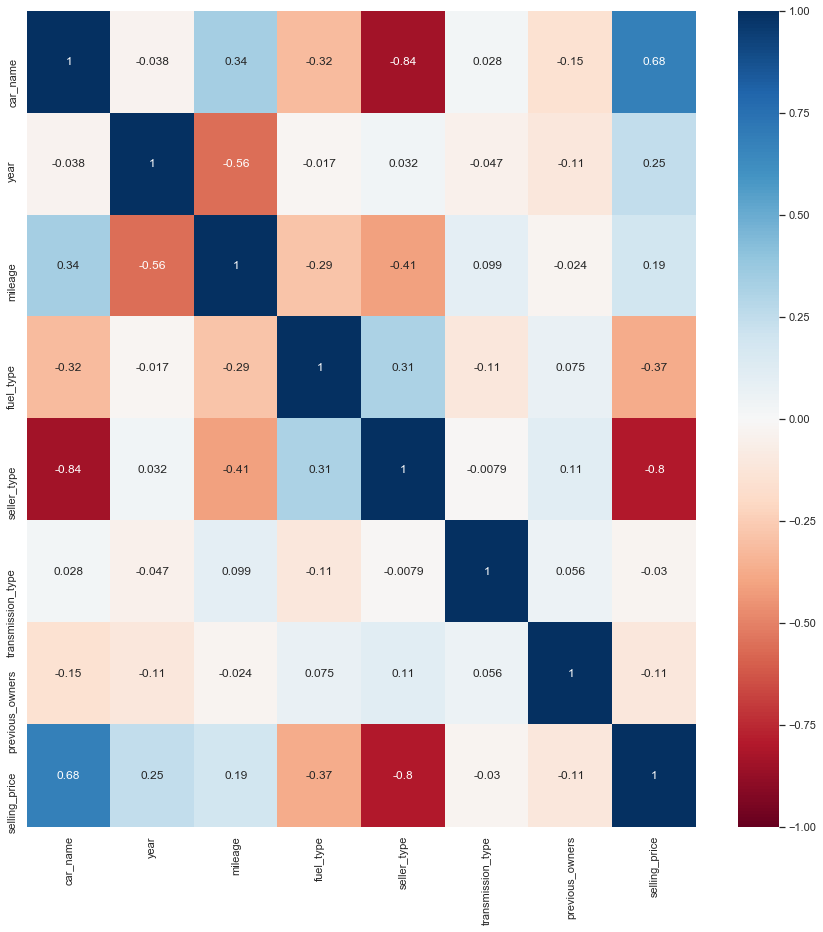

In [252]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(),xticklabels= data.corr().columns, yticklabels= data.corr().columns,
            annot = True, vmin=-1, vmax=1, center= 0, cmap='RdBu')
plt.show()

# Hitogram of values counts in each column

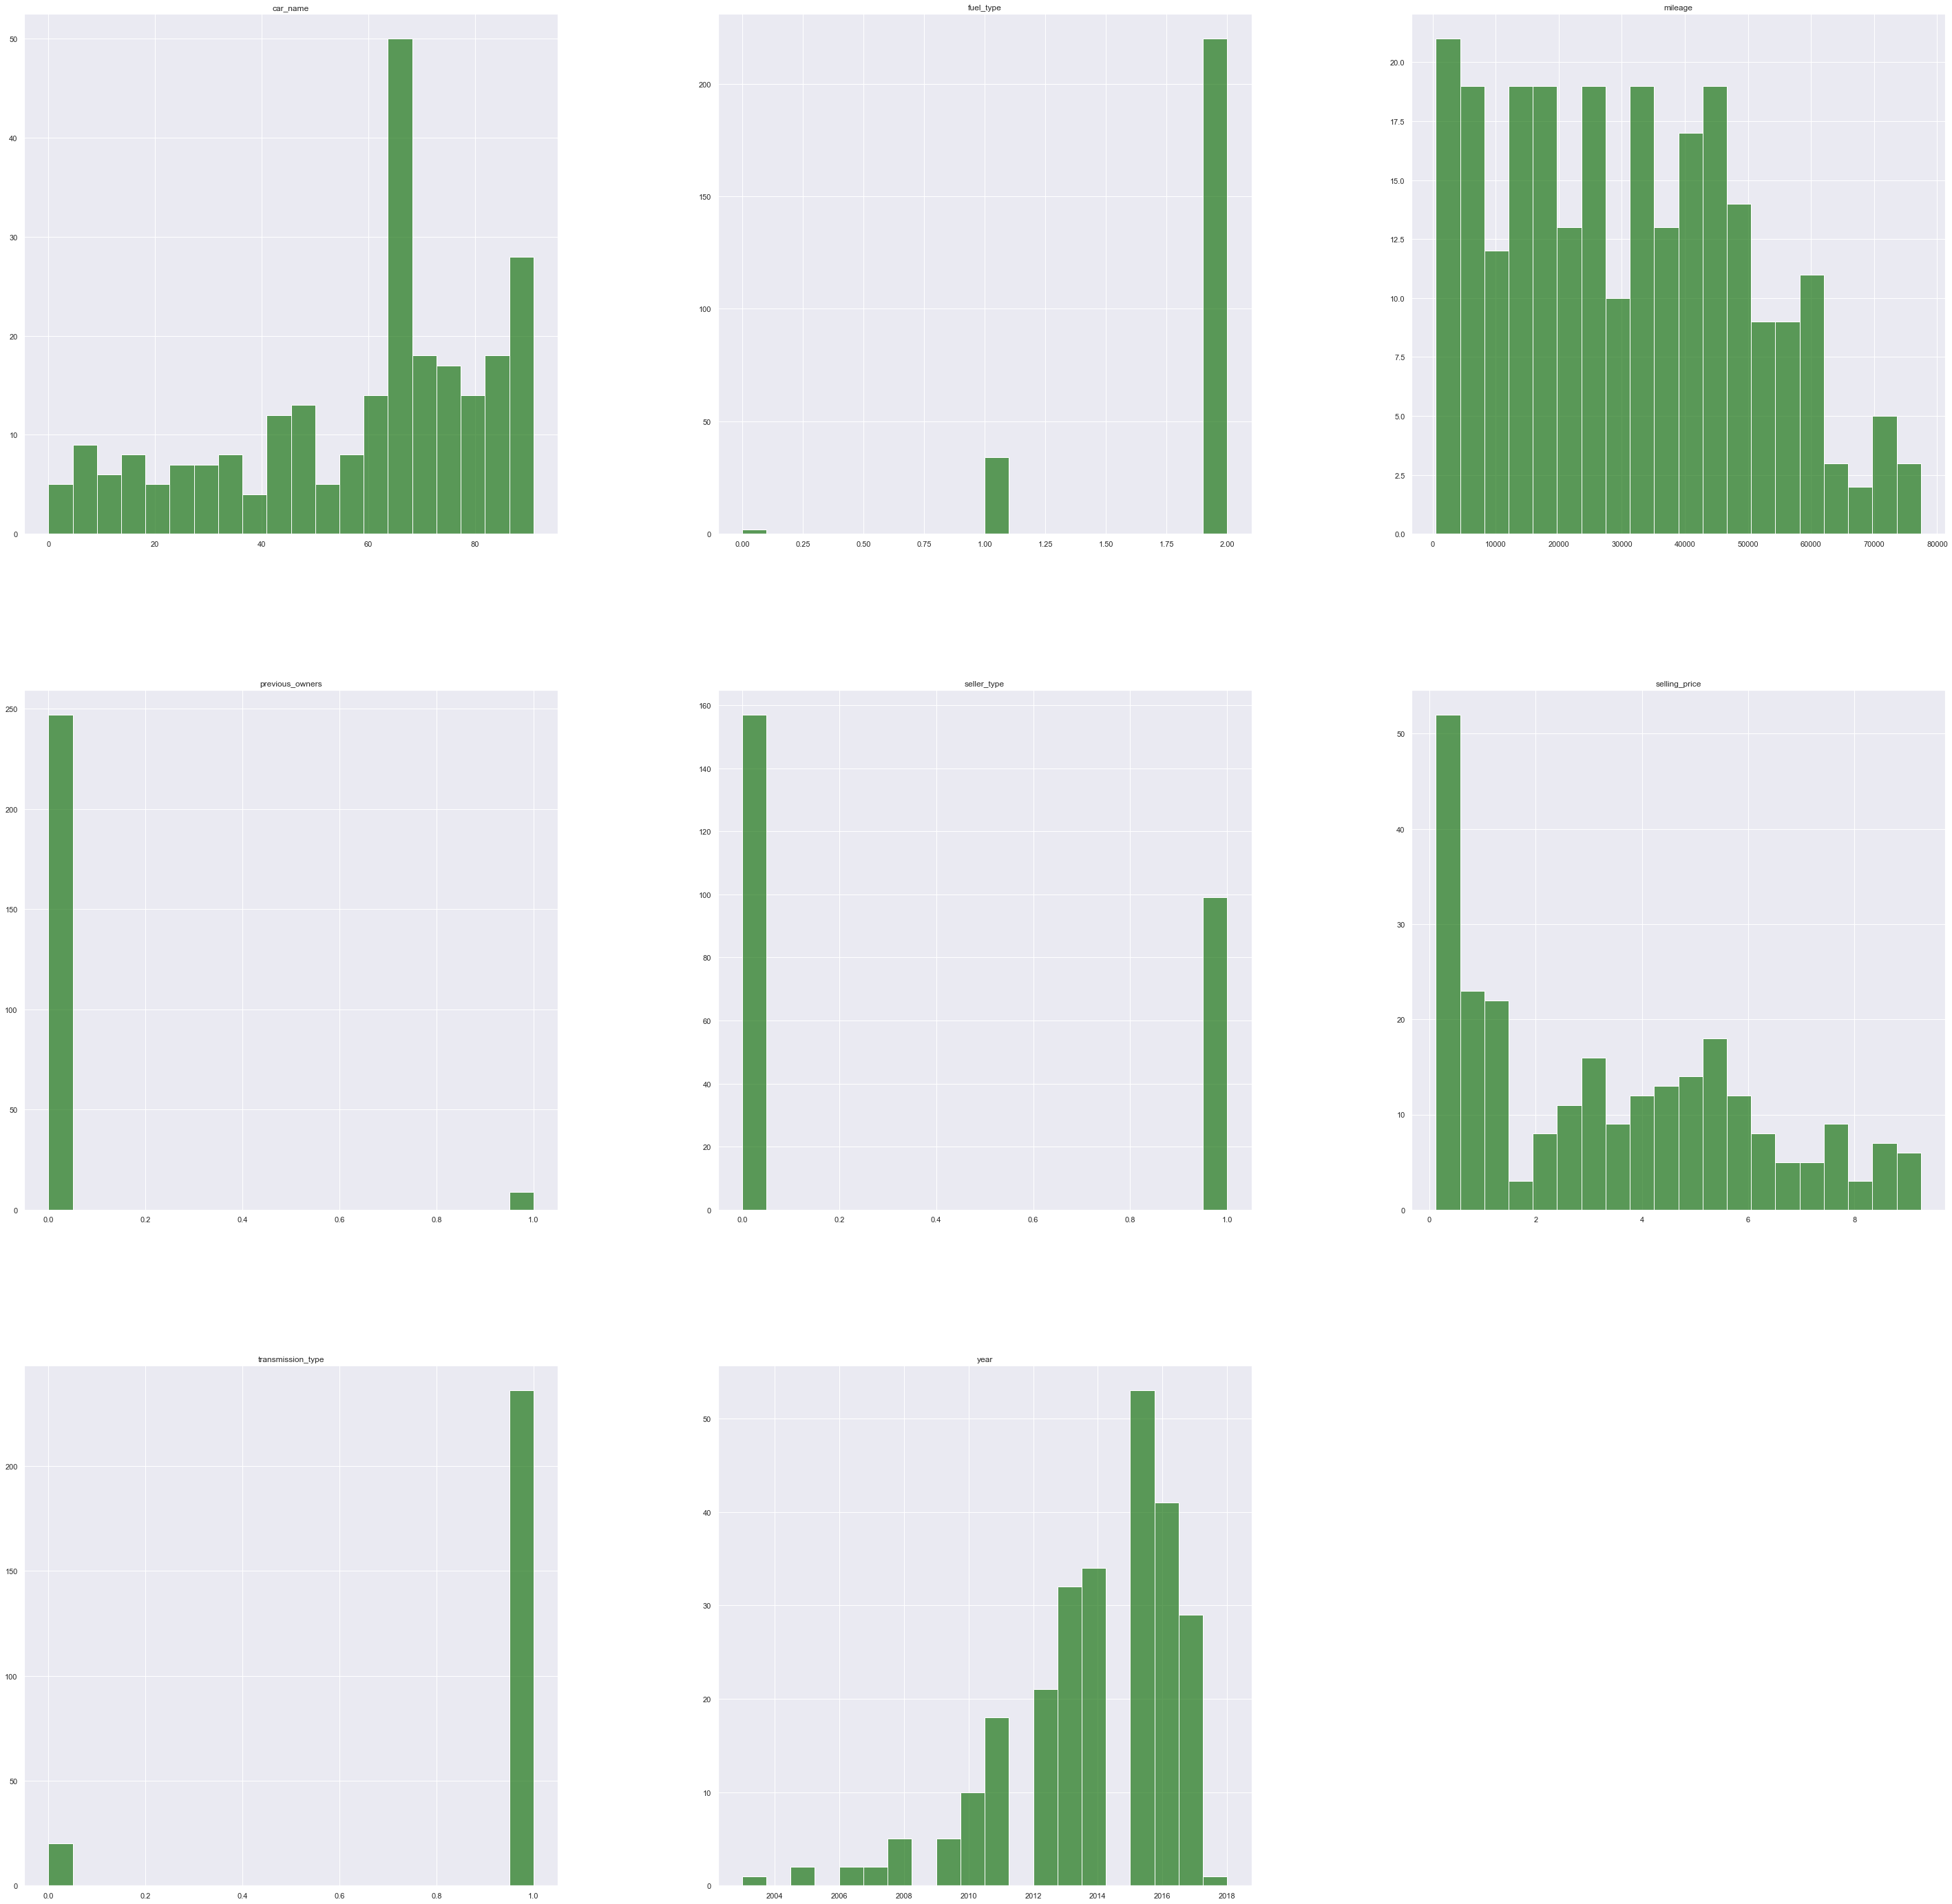

In [253]:
data.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

The following code is to export the cleaned and encoded data for prediction modeling:

data.to_csv('encoded2.csv',index = False)